# Aviation Company Risk Analysis

![Aircrafts Image](images/aircrafts.png)

## Overview

This project analyzes the risks involved in the running of an aircraft business. This is essential as the company is planning on expanding its portfolio by getting into that sector. In this notebook, we analyze a dataset that entails the logs of aircraft accidents that runs from 1948 to 2022. The company will utilize this analysis in the allocation of resources machine procurement, operation and risk mitigation so as to achieve highest profitability and human safety in the sector.

## Business Problem

The company may be able to realize where their resources will be most profitable and risk mitigative when beginning the aircraft business operations. This will make sure cost overruns resulting from accidents are reduced and safety to staff and customers is enhanced. This will also result in business growth as resources can be redirected to expansion. Using Aviation Data provided which logs all accidents and their respective information, I use this project to define accident trends and possible causes to predict the company's sourcing for recommended aviation machinery, their maintenance and best working period with the least number of recorded accidents.

## Data Understanding

![Small Aircraft](images/aircraft_2.png)

The aviation data that has been selected to be used in this analysis project has a list of recorded accidents that run from 1948. Every entry has a unique ID that distinguishes them from the rest. The aviation data provides the information about the plane involved in the accidents (e.g. make, number of engines), as well as the situation surrounding the aircraft at the time of occurrence of the accident.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/AviationData.csv', encoding = 'latin1', low_memory = False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/04/1980


In [5]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,2.02212E+13,Accident,ERA23LA093,26/12/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29/12/2022
88885,2.02212E+13,Accident,ERA23LA095,26/12/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,26/12/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27/12/2022
88887,2.02212E+13,Accident,WPR23LA076,26/12/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,2.02212E+13,Accident,ERA23LA097,29/12/2022,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30/12/2022


In [6]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
df['Make'].value_counts()

Cessna                22227
Piper                 12029
CESSNA                 4922
Beech                  4330
PIPER                  2841
                      ...  
REED WILLIAM A            1
Ag-cat Corporation        1
Allen D. Potts            1
PITTMAN EDDIE G           1
Hallstrom                 1
Name: Make, Length: 8237, dtype: int64

In [8]:
df['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [9]:
df['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: Engine.Type, dtype: int64

In [10]:
df['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [11]:
df['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [12]:
df['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

## Data Preparation

### Data Cleaning

For the aviation data provided, I make it easier to work with by normalizing column names and dropping unnecessary columns, as well as dropping the rows with null values.

In [13]:
# change column names to make them easier to use
df.columns = df.columns.str.lower().str.replace('.', '_')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                88889 non-null  object 
 1   investigation_type      88889 non-null  object 
 2   accident_number         88889 non-null  object 
 3   event_date              88889 non-null  object 
 4   location                88837 non-null  object 
 5   country                 88663 non-null  object 
 6   latitude                34382 non-null  object 
 7   longitude               34373 non-null  object 
 8   airport_code            50249 non-null  object 
 9   airport_name            52790 non-null  object 
 10  injury_severity         87889 non-null  object 
 11  aircraft_damage         85695 non-null  object 
 12  aircraft_category       32287 non-null  object 
 13  registration_number     87572 non-null  object 
 14  make                    88826 non-null

In [15]:
#include only columns to be used in the dataset
columns_to_keep = ['event_date', 'aircraft_damage', 'make', 'number_of_engines', 'engine_type', 'purpose_of_flight', 'broad_phase_of_flight']

df_filtered = df[columns_to_keep]

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   event_date             88889 non-null  object 
 1   aircraft_damage        85695 non-null  object 
 2   make                   88826 non-null  object 
 3   number_of_engines      82805 non-null  float64
 4   engine_type            81812 non-null  object 
 5   purpose_of_flight      82697 non-null  object 
 6   broad_phase_of_flight  61724 non-null  object 
dtypes: float64(1), object(6)
memory usage: 4.7+ MB


In [16]:
# drop all the rows with null values
df_filtered = df_filtered.dropna()

In [17]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58394 entries, 0 to 63911
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   event_date             58394 non-null  object 
 1   aircraft_damage        58394 non-null  object 
 2   make                   58394 non-null  object 
 3   number_of_engines      58394 non-null  float64
 4   engine_type            58394 non-null  object 
 5   purpose_of_flight      58394 non-null  object 
 6   broad_phase_of_flight  58394 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.6+ MB


I then convert the column recording the date of the accidents to a datetime formart as I will require to use the months in my analysis.

In [18]:
# change 'event_date' column to datetime
df_filtered['event_date'] = pd.to_datetime(df_filtered['event_date'], errors='coerce')


In [19]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58394 entries, 0 to 63911
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   event_date             58394 non-null  datetime64[ns]
 1   aircraft_damage        58394 non-null  object        
 2   make                   58394 non-null  object        
 3   number_of_engines      58394 non-null  float64       
 4   engine_type            58394 non-null  object        
 5   purpose_of_flight      58394 non-null  object        
 6   broad_phase_of_flight  58394 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 3.6+ MB


In [20]:
df_filtered.head()

,event_date,aircraft_damage,make,number_of_engines,engine_type,purpose_of_flight,broad_phase_of_flight
0,1948-10-24,Destroyed,Stinson,1.0,Reciprocating,Personal,Cruise
1,1962-07-19,Destroyed,Piper,1.0,Reciprocating,Personal,Unknown
2,1974-08-30,Destroyed,Cessna,1.0,Reciprocating,Personal,Cruise
3,1977-06-19,Destroyed,Rockwell,1.0,Reciprocating,Personal,Cruise
6,1981-01-08,Destroyed,Cessna,1.0,Reciprocating,Personal,Unknown


I proceed to convert all the object columns to title case as a difference in cases often splits elements that are of the same category into two (e.g Cessna and CESSNA in makes).

In [21]:
# convert the object columns to title case

df_filtered['aircraft_damage'] = df_filtered['aircraft_damage'].apply(lambda x: x.title() if isinstance(x, str) else x)
df_filtered['make'] = df_filtered['make'].apply(lambda x: x.title() if isinstance(x, str) else x)
df_filtered['engine_type'] = df_filtered['engine_type'].apply(lambda x: x.title() if isinstance(x, str) else x)
df_filtered['purpose_of_flight'] = df_filtered['purpose_of_flight'].apply(lambda x: x.title() if isinstance(x, str) else x)
df_filtered['broad_phase_of_flight'] = df_filtered['broad_phase_of_flight'].apply(lambda x: x.title() if isinstance(x, str) else x)

In [22]:
# Save cleaned dataset as CSV
df_filtered.to_csv('./data/cleaned_aviation_data_df.csv')

## Analysis

### Categorical Data and Accident Occurrence

We begin by looking into the columns that are characterised by being categorical thus the data is discrete. This means that the data only takes up specific values without any other data in between. This can help us determine which conditions facilitate accident occurrence.

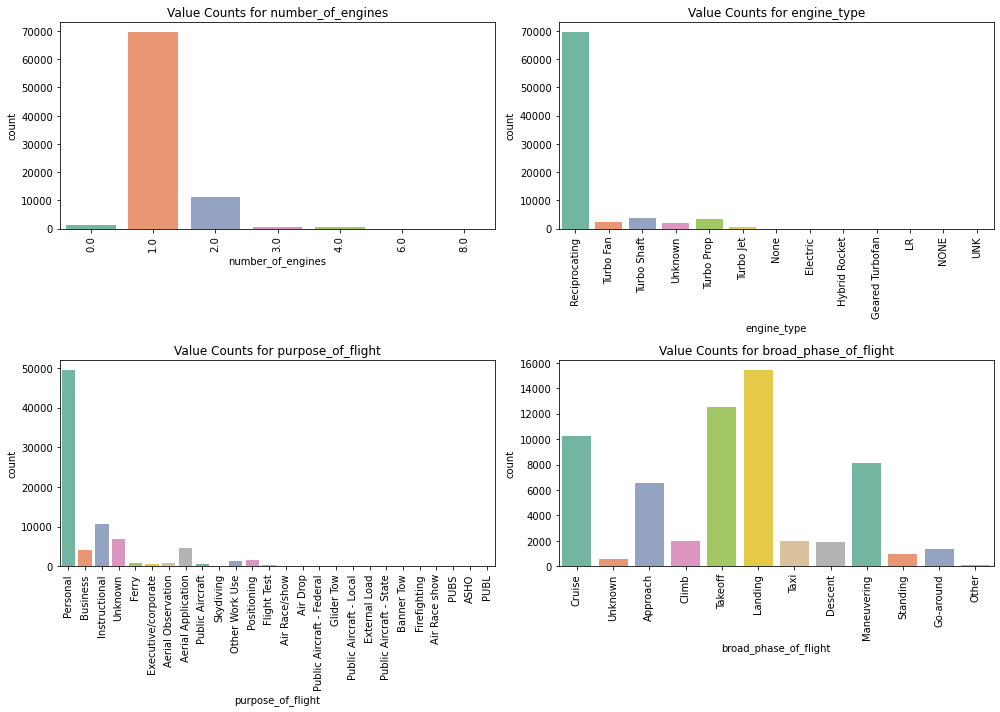

In [32]:
# Defining the columns you want to plot value counts for
categorical_columns = ['number_of_engines', 'engine_type', 'purpose_of_flight', 'broad_phase_of_flight']

# Plotting the value counts for each column
plt.figure(figsize=(14, 10))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)  # Create subplots to display all value counts
    sns.countplot(data=df, x=column, palette='Set2')
    plt.title(f'Value Counts for {column}')
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.savefig("images/value_counts.png", dpi=150)
plt.show()

### Most Common Makes Involved in Accidents

Finding the Aircraft Makes that are majorly involved in the accidents will bring about the discovery of why they regularly occur and ways of mitigating the risk or eradicating it altogether.

In [24]:
# Find the most common makes in the dataset
most_common_makes = df_filtered['make'].value_counts().head(10)

print(most_common_makes)

Cessna      20397
Piper       11000
Beech        3874
Bell         1757
Grumman      1037
Mooney       1010
Bellanca      857
Robinson      730
Hughes        711
Boeing        645
Name: make, dtype: int64


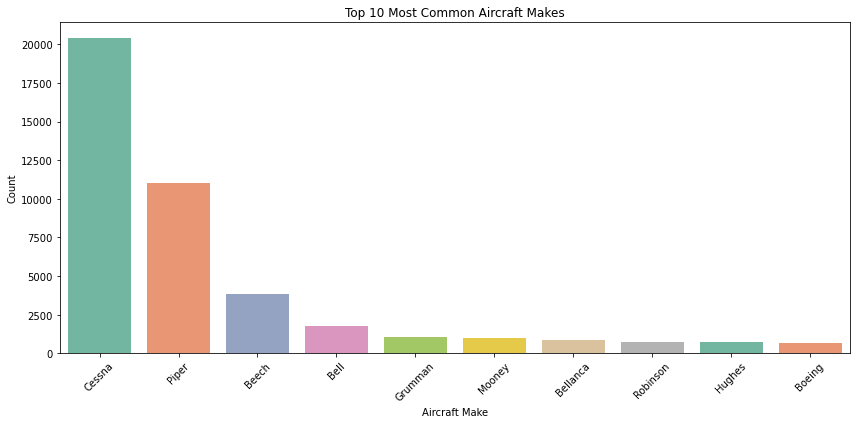

In [29]:
# Plotting a histogram for the 10 most common makes involved in accidents
plt.figure(figsize=(12, 6))
sns.barplot(x=most_common_makes.index, y=most_common_makes.values, palette='Set2')
plt.title('Top 10 Most Common Aircraft Makes')
plt.xlabel('Aircraft Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("./images/top_10_most_common_makes.png", dpi=150)
plt.show()

### Monthly Data of Accident Occurrence

This data can be used to analyse when accidents are most prone to happen and realize the reason why which we can then be able to mitigate or cut down on flight travel during hazardous months and capitalize on the safer ones.

In [26]:
# Obtaining the month from 'event_date'
df_filtered['month'] = df_filtered['event_date'].dt.month

# Obtaining count the number of accidents for each month
monthly_accidents = df_filtered['month'].value_counts().sort_index()

monthly_accidents.describe()

count      12.000000
mean     4866.166667
std       833.598861
min      3958.000000
25%      4032.500000
50%      4730.500000
75%      5624.250000
max      6189.000000
Name: month, dtype: float64

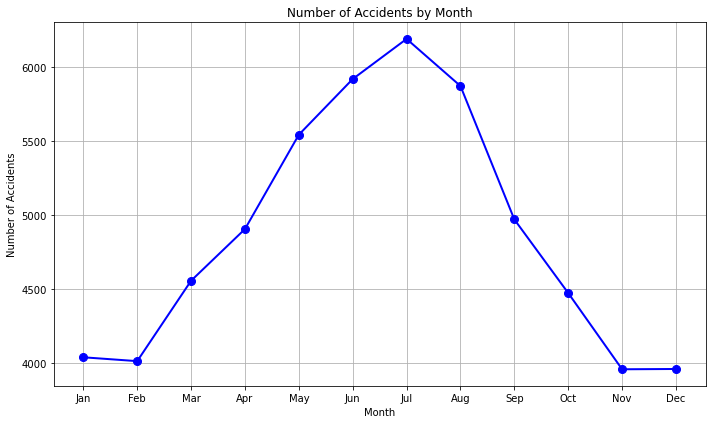

In [28]:
# Plotting the number of accidents by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_accidents.index, monthly_accidents.values, marker='o', color='b', linestyle='-', markersize=8, linewidth=2)
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()

plt.savefig("images/number_of_accidents_by_month.png", dpi=150)
plt.show()

## Conclusions

This analysis leads to three recommendations for the upcoming aviation business enterprise:
 - **Take up aircrafts with more than one engine.** This ensures overall safety as in case of an engine failure, there is atleast one back-up engine which reduces the risk of accidents.
 - **Take up the Cessna model.** Though from the analysis these have the most recording of accidents, this can be attributed to the single-engine type being more popular and thus ending up in more accidents. Therefore taking up the two-engined Cessna would prove to be safer.
 - **Make sure maintenance is regularly done especially on the landing gear and instruments.** Most accidents were clocked during the landing phase of the flights. This can be mostly attributed to faulty landing gear and instruments that are fundamentsal to an incident free flight.
 - **Picking aircrafts which do not utilize the reciprocating engine type.** The reciprocating engine type is most prone to accidents since it is less powerful than the rest, such as turboprop. Selecting the other types will reduce the accidents that occur.

## Next Steps

Further analyses that could yield additional insights to further improve the aviation business are:
 - **Maintenance methods.** This modeling will enhance the maintenance methods and after implementation will reduce the number of maintenance-caused accidents.
 - **Pilot selection.** This modeling will show priority to experienced pilots to enhance safety of the customers and limit accidents.
 - **Weather data analysis** This model will provide critical data on the different weather patterns and whhich of those can be handled by the aircrafts and which will need a halt in operations for passenger and aircraft safety.